# Part II - (LOAN DATA FROM PROSPER)
## by (RICHARD MADU)


## Investigation Overview


> This project seeks to investigate the data from prosper loan and it seeks to reveal insights on the the behaviour and the trends of key variables in the data set .


## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others..

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
prosper_loan = pd.read_csv('prosperLoanData.csv')

In [3]:
df = prosper_loan.loc[:, prosper_loan.columns.intersection(['LoanStatus','ProsperScore','EmploymentStatus','BorrowerAPR','ProsperRating (Alpha)','CreditGrade','Term',
                                               'LenderYield','MonthlyLoanPayment', 'IsBorrowerHomeowner', 'LoanOriginalAmount', 'StatedMonthlyIncome'])]

In [4]:
#create a function for the label to avoid repetition of codes
def label (x,y,z):
    """
    Args:
    x(str): x-axis title
    y(str): y-axis title
    z(str): main title
    
    returns:
    None
    
    """
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(z)
    plt.show()

In [5]:
# select the color pallete
base_color = sb.color_palette()[0]

In [6]:
sample = np.random.choice(df.shape[0], 200, replace = False)
df_samp = df.loc[sample]

## (Visualization 1)
## DISTRIBUTION OF LOAN ORIGINAL AMOUNT

> LOAN ORIGINAL AMOUNT IS THE AMOUNT TAKEN AS LOAN. TO UNDERSTAND THE LOAN AMOUNT I PLOTTED ITS DISTRIBUTION

In [7]:
bins = np.arange(0,df['LoanOriginalAmount'].max()+ 1000,2500)

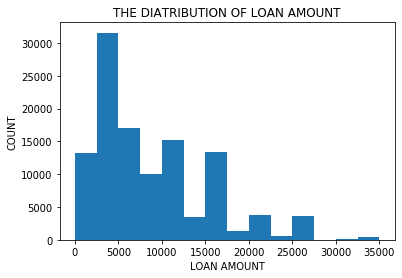

In [8]:
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins)
label('LOAN AMOUNT','COUNT','THE DIATRIBUTION OF LOAN AMOUNT');

THE DISTRIBUTION OF THE LOAN AMOUNT IS SKEWED TO THE RIGHT WHICH IMPLIES THAT THE MOST OF THE DATA ARE IN THE LOWER BOUND

### LOAN AMOUNT VS MONTHLY LOAN PAYMENT

NEXT I PLOT A 2D HISTROGRAM TO SEE THE RELATIONSHIP BETWEEN THE LOAN AMOUNT AND THE MONTHLY LOAN PAYMENT. THE BORROWERS ARE EXPECTED TO REPAY THEIR LOAN BY MAKING MONTHLY INSTALLMENT PAYMENT AND IT IS RECORDED AS MonthlyLoanAmount


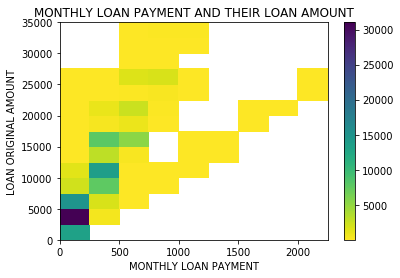

In [9]:
# SET THE BINS FOR THE 2D HISTOGRAM
bins_x = np.arange(0,df['MonthlyLoanPayment'].max() + 100, 250)
bins_y = np.arange(0, df['LoanOriginalAmount'].max() +1000, 2500)
#PLOT THE 2D HISTOGRAM
plt.subplot(1, 1, 1)
plt.hist2d(data = prosper_loan, x = 'MonthlyLoanPayment', y = 'LoanOriginalAmount', cmin=0.5, cmap='viridis_r',  bins = [bins_x, bins_y])
plt.colorbar()
label('MONTHLY LOAN PAYMENT', 'LOAN ORIGINAL AMOUNT','MONTHLY LOAN PAYMENT AND THEIR LOAN AMOUNT')

MOST PEOPLE TAKE LOAN IN THE RANGE OF 2500 - 5000 AND THEIR MONTHLY LOAN PAYMENT IS BETWEEN 0-250 


### LOAN AMOUNT VS BORROW'S APR

BORROW'S APR IS THE THE INTEREST RATE ON THE LOAN TAKEN. A SCATTER PLOT THAT SHOWS THE RELATIONSHIP BETWEEN THE LOAN AMOUNT AND THE INTEREST RATE IS PLOT BELOW

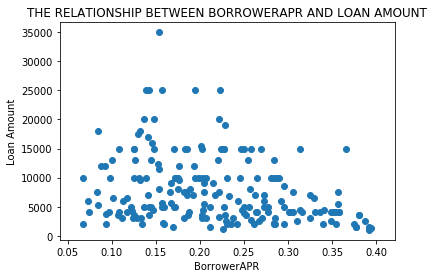

In [10]:
plt.scatter(data = df_samp,x = 'BorrowerAPR', y = 'LoanOriginalAmount')
label('BorrowerAPR','Loan Amount', 'THE RELATIONSHIP BETWEEN BORROWERAPR AND LOAN AMOUNT')

THERE IS NO CLEAR CUT RELATIONSHIP BETWEEN THE LOAN AMOUNT AND INTEREST RATE BECAUSE WE HAVE LOAN AMOUNT OF UNDER 5000 BEEN CHARGED AS LOW AS 7% AND AS HIGH AS 38%. A FUTHER INVESTIGATION OF THE CORRELATION COEFFICITENT WOULD MAKE THE RELATIONSHIP CLEARER

### LOAN AMOUNT VS TERM

THE TERM OF LOAN IS THE AMOUNT OF TIME GIVEN TO THE BORROWER TO REPAY THE LOAN AND IT IS CATEGORISED IN TO 12 MONTHS, 36 MONTHS AND 60 MONTHS. WE WOULD USE A VIOLIN PLOT TO INVESTIGATE THIS

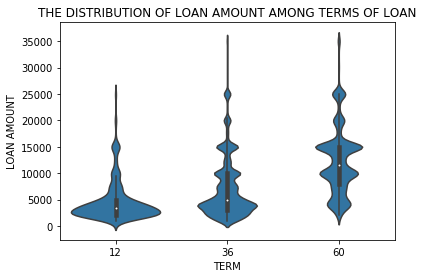

In [11]:
sb.violinplot(data = df, x = 'Term', y = 'LoanOriginalAmount', color = base_color)
label('TERM','LOAN AMOUNT','THE DISTRIBUTION OF LOAN AMOUNT AMONG TERMS OF LOAN');

THERE IS A POSITIVE RELATIONSHIP BETWEEN THE AMOUNT LOANED AND THE LOAN TERM. HIGHER AMOUNT TYPICALLY HAVE LONGER TERMS

### LOAN AMOUNT VS MONTHLY PAYMENT VS TERMS

NEXT IT WOULD OF INTEREST TO VISUALISE THE SPREAD OF THE LOAN AMOUNT, MONTHLY PAYMENT AND TERMS. THIS WOULD GIVE US AN IDEA OF HOW THE INDIVIDUAL VARIABLES INTER-RELATE WITH EACH OTHER

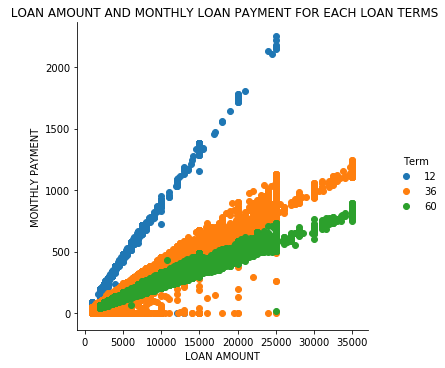

In [12]:
g = sb.FacetGrid(data = df, hue = 'Term', size = 5)
g.map(plt.scatter, 'LoanOriginalAmount', 'MonthlyLoanPayment')
g.add_legend()
label('LOAN AMOUNT', 'MONTHLY PAYMENT',' LOAN AMOUNT AND MONTHLY LOAN PAYMENT FOR EACH LOAN TERMS')

THE MULTIVARIATE ANALYSIS SHOWS THAT LOANS WITH THE LONGER TERM HAVE A HIGHER MONTHLY PAYMENT. ALSO THERE IS NO DISPARITY BETWEEN THE LOAN AMOUNT TAKEN FOR THE THREE LOAN TERMS 

## (Visualization 2)

## DISTRIBUTION OF BORROWER APR

> AS MENTIONED EARLIER THE BORROWERAPR IS THE INTEREST RATE OF THE LOAN. HERE WE WOULD BE RUNNING A UNIVARIATE ANALYSIS OF THE BORROWER APR TO UNDERSTAND THE DISTRIBUTION OF THE INTEREST RATE

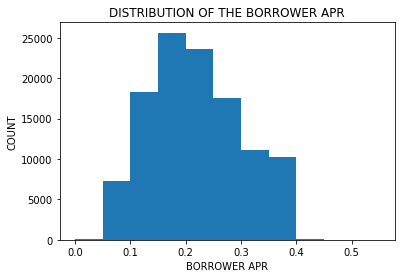

In [13]:
bins = np.arange(0,df['BorrowerAPR'].max() + 0.05,0.05)
plt.hist(data = df, x = 'BorrowerAPR', bins = bins)
label('BORROWER APR', 'COUNT','DISTRIBUTION OF THE BORROWER APR');

THE BORROWER APR IS NORMALLY DISTRIBUTED WITH MODE RANGING BETWEEN 0.15-0.2

### BORROWER APR VS MONTHLY PAYMENT

WE CAN SEE THE RELATIONSHIP OF THE INTEREST RATE AND MONTHLY PAYMENT BY PLOTING A SCATTER PLOT OF A SAMPLE OF THE DATASET

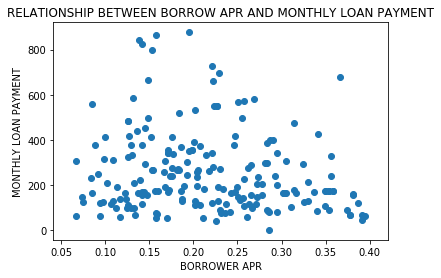

In [14]:
plt.scatter(data = df_samp, x='BorrowerAPR', y = 'MonthlyLoanPayment')
label('BORROWER APR', 'MONTHLY LOAN PAYMENT','RELATIONSHIP BETWEEN BORROW APR AND MONTHLY LOAN PAYMENT')

THERE IS NO STRONG RELATIONSHIP BETWEEN THE INTEREST RATE AND MONTHLY LOAN PAYMENT. THERE MIGHT BE A CORRELATION BUT IT IS OVER THE SCOPE OF THIS STUDY

### BORROWER APR VS LENDERS YIELD

WE WOULD BE PLOTTING A SCATTER PLOT TO INVESTIGATE THE RELATIONSHIP BETWEEN THE INTEREST RATE AND THE LENDERS YIELD

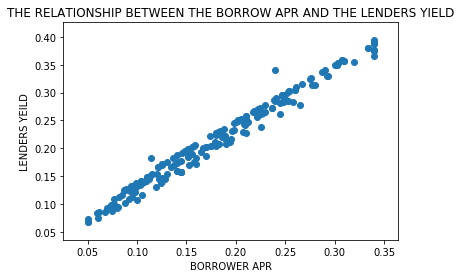

In [15]:
plt.scatter(data = df_samp, y = 'BorrowerAPR', x = 'LenderYield')
label('BORROWER APR', 'LENDERS YEILD','THE RELATIONSHIP BETWEEN THE BORROW APR AND THE LENDERS YIELD');

THERE IS A PERFECT POSITIVE RELATIONSHIP BETWEEN THE LENDER YIELD AND THE BORROWER APR

### BORROWER APR ON THE LOAN AMOUNT AND THE EMPLOYMENT STATUS

HERE WE WOULD BE INVESTIGATING THE RELATIONSHIP BETWEEN THE BORROWER APR, LOAN AMOUNT AND EMPLOYMENT STATUS

In [16]:
df = df[df['EmploymentStatus'].notna()]
df['EmploymentStatus'] = df['EmploymentStatus'].replace(['Full-time','Part-time'],'Employed')
df['EmploymentStatus'] = df['EmploymentStatus'].replace(['Not available','Other'],'Others')
df['EmploymentStatus'] = df['EmploymentStatus'].replace(['Not employed'],'Unemployed')

In [17]:
df['EmploymentStatus'].unique()

array(['Self-employed', 'Employed', 'Others', 'Unemployed', 'Retired'],
      dtype=object)

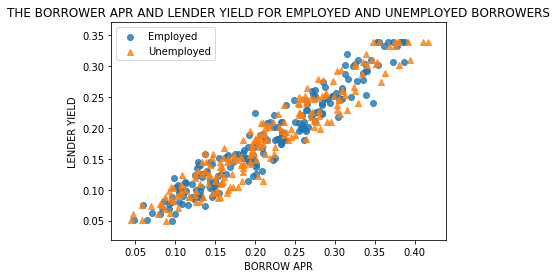

In [18]:
#set the makers
markers = [['Employed', 'o'],
           ['Unemployed', '^']]
# set the non positional encoding
for c, r in markers:
    plot_data = df_samp.loc[df_samp['EmploymentStatus'] == c]
    sb.regplot(data = df_samp, x = 'BorrowerAPR', y = 'LenderYield',x_jitter = 0.04, fit_reg = False, marker = r)
plt.legend(['Employed','Unemployed'])
label('BORROW APR','LENDER YIELD','THE BORROWER APR AND LENDER YIELD FOR EMPLOYED AND UNEMPLOYED BORROWERS')

ALTHOUGH THERE IS A POSITIVE RELATIONSHIP BETWEEN THE LENDER'S YIELD AND THE BORROWER'S APR, THERE IS NO DISPARITY BETWEEN THE INTEREST RATE CHARGED TO THE EMPLOYED BORROWERS AND THE UNEMPLOYED

## (Visualization 3)

### DISTRIBUTION OF LENDER YIELD

A HISTOGRAM WOULD SHOW THE DISTRIBUTION OF THE LENDER'S YIELD

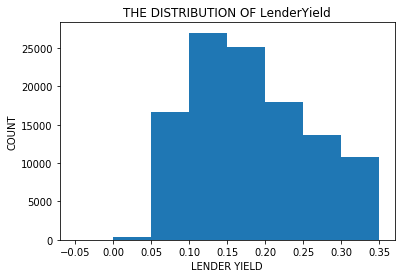

In [19]:
bins = np.arange(-0.05,df['LenderYield'].max() + 0.05, 0.05)
plt.hist(data = df, x = 'LenderYield', bins = bins)
label('LENDER YIELD', 'COUNT','THE DISTRIBUTION OF LenderYield')

THE DISTRIBUTION IS SLIGHTLY SKEWED TO THE RIGHT WITH THE MODE BETWEEN 0.1 AND 0.15 

### LENDER YIELD VS LOAN AMOUNT

THE SCATTER PLOT BELOW SEEKS TO INVESTIGATE THE RELATIONSHIP BETWEEN LENDER YIELD AND THE LOAN AMOUNT

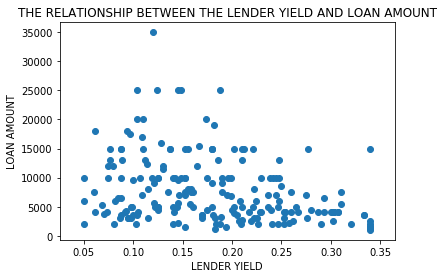

In [20]:
plt.scatter(data = df_samp, x = 'LenderYield', y = 'LoanOriginalAmount')
label('LENDER YIELD', 'LOAN AMOUNT', 'THE RELATIONSHIP BETWEEN THE LENDER YIELD AND LOAN AMOUNT');

THERE IS NO RELATIONSHIP BETWEEN THE LENDER YIELD AND THE AMOUNT LOANED 

### LOAN AMOUNT VS LOAN AMOUNT FOR HOME OWNERS AND NON HOME OWNERS

HERE WE TRY TO SPOT THE DIFFERENCE BETWEEN THE DISTRIBUTION OF LOAN AMOUNT AND LENDER YIELD FOR HOME OWNERS AND NON HOME OWNERS


In [21]:
sample = np.random.choice(df.shape[0], 2000, replace = False)
df_samp2 = df.loc[sample]

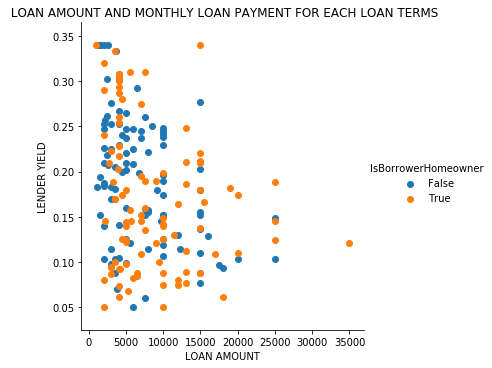

In [26]:

g = sb.FacetGrid(data = df_samp, hue = 'IsBorrowerHomeowner', size = 5)
g.map(plt.scatter, 'LoanOriginalAmount', 'LenderYield')
g.add_legend()
label('LOAN AMOUNT', 'LENDER YIELD',' LOAN AMOUNT AND MONTHLY LOAN PAYMENT FOR EACH LOAN TERMS')

THE LOWER BOUNDARY OF THE LOAN AMOUNT IS POPULATED BY LOANS FROM NON HOME OWNERS